In [57]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [58]:
words = open('names.txt').read().splitlines()

In [59]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [60]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:3]:
  
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .


In [61]:
X.shape, Y.shape

(torch.Size([16, 3]), torch.Size([16]))

In [62]:
C = torch.randn((27,2)) # THIS IS THE EMBEDDING MATRIX



In [63]:
C[5] # the embedding for character 'e'

tensor([-0.9047, -1.6172])

In [64]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # one-hot encoding for 'e'

tensor([-0.9047, -1.6172])

In [65]:
# above cells are same because we are using a one-hot encoding of the character 'e' and multiplying it with the embedding matrix C and rest are zeros


In [66]:
C[[5, 6, 7]].shape # embeddings for 'e', 'f', 'g'

torch.Size([3, 2])

In [67]:
C[torch.tensor([5, 6, 7,7,7])] # embeddings for 'e', 'f', 'g'

tensor([[-0.9047, -1.6172],
        [ 0.0919, -0.8529],
        [ 0.5054, -1.2312],
        [ 0.5054, -1.2312],
        [ 0.5054, -1.2312]])

In [68]:
C[X].shape ,C[X][1] # embeddings for all characters in X

(torch.Size([16, 3, 2]),
 tensor([[ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [-0.9047, -1.6172]]))

In [69]:
# Tensor	Shape	Meaning
# C	(vocab_size, embedding_dim)	Embedding matrix
# X	(batch_size, sequence_len)	Batch of token indices
# C[X]	(batch_size, sequence_len, embedding_dim)	Embeddings for each token

In [70]:
X[13][2]  , C[X][13][2] , C[1]   # embedding for the 2nd character in the 13th example the value is 1 because the character is 'a' and the embedding for 'a' is the first row in C

(tensor(1), tensor([ 1.3848, -0.7505]), tensor([ 1.3848, -0.7505]))

In [71]:
emb = C[X] # embeddings for all characters in X


In [72]:
W1 = torch.randn((2*3, 100)) # weights for the first layer 2 is embedding dim and we have 3 of them 
b1 = torch.randn(100) # bias for the first layer


In [73]:
torch.cat([emb[:,0,: ] , emb[:,1,: ], emb[:,2,: ]] ,dim=1).shape # concatenating the embeddings for the first, second and third character in each example

torch.Size([16, 6])

### Example: Using `torch.unbind`

The function `torch.unbind(tensor, dim)` removes a given dimension and returns a tuple of slices along that dimension.

For example, given the tensor `emb` of shape `(16, 3, 2)`:

```python
emb.shape
# Output: torch.Size([16, 3, 2])
```

Unbinding along `dim=1`:

```python
emb0, emb1, emb2 = torch.unbind(emb, dim=1)
print(emb0.shape, emb1.shape, emb2.shape)
# Output: torch.Size([16, 2]) torch.Size([16, 2]) torch.Size([16, 2])
```

This splits `emb` into three tensors, each corresponding to one position in the context window.

In [74]:
torch.unbind(emb,dim=1)# unbinding the embeddings along the second dimension


(tensor([[ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [-0.9047, -1.6172],
         [ 0.4791, -0.0680],
         [ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [-0.2479, -0.7499],
         [ 0.6695, -0.4309],
         [-0.4687,  0.1919],
         [ 0.5085, -0.7568],
         [ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [ 1.3848, -0.7505]]),
 tensor([[ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [-0.9047, -1.6172],
         [ 0.4791, -0.0680],
         [ 0.4791, -0.0680],
         [ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [-0.2479, -0.7499],
         [ 0.6695, -0.4309],
         [-0.4687,  0.1919],
         [ 0.5085, -0.7568],
         [-0.4687,  0.1919],
         [ 0.1768, -0.8946],
         [ 0.1768, -0.8946],
         [ 1.3848, -0.7505],
         [ 0.5085, -0.7568]]),
 tensor([[ 0.1768, -0.8946],
         [-0.9047, -1.6172],
         [

In [75]:
torch.cat(torch.unbind(emb,dim=1), dim=1).shape # concatenating the embeddings for the first, second and third character in each example

torch.Size([16, 6])

In [76]:
a = torch.arange(18)

In [77]:
a.view(3, 6) , a.view (2,9)

(tensor([[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17]]),
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
         [ 9, 10, 11, 12, 13, 14, 15, 16, 17]]))

emb.view(-1,6)@ W1 shape is 16 x 100
 b1s shape is               1  x 100 it will be broadcasated and added

In [78]:
h = emb.view(-1,6)@ W1 + b1 # matrix multiplication with the weights and adding the bias
h.shape # shape of the hidden layer

torch.Size([16, 100])

In [79]:
h = torch.tanh(h) # activation function

In [80]:
W2 = torch.randn((100, 27)) # weights for the second layer
b2 = torch.randn(27) # bias for the second layer
logits = h @ W2 + b2 # output layer
logits.shape # shape of the output layer

torch.Size([16, 27])

In [81]:
counts = logits.exp() # converting logits to counts
prob = counts / counts.sum(1, keepdim=True) # converting counts to probabilities
prob.shape , prob[0].sum() # shape of the probabilities


(torch.Size([16, 27]), tensor(1.0000))

In [82]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

In [83]:
prob[torch.arange(len(Y)), Y] # getting the probabilities for the correct characters

tensor([4.0255e-14, 9.7780e-02, 5.1593e-03, 7.5860e-10, 4.9247e-11, 8.9028e-10,
        6.1235e-08, 5.2317e-10, 1.8592e-11, 2.1631e-05, 3.6681e-05, 2.5378e-07,
        2.4531e-07, 9.7059e-13, 6.0682e-13, 9.5770e-06])

In [84]:
loss = -(torch.log(prob[torch.arange(len(Y)), Y]).mean()) # calculating the loss

In [85]:
loss

tensor(17.8379)

More respectable

In [86]:
X.shape, Y.shape # shapes of the input and output

(torch.Size([16, 3]), torch.Size([16]))

In [87]:
g  = torch.Generator().manual_seed(2147483647) # random number generator for reproducibility
C = torch.randn((27, 2), generator=g) # re-initializing the embedding matrix with a fixed seed
W1 = torch.randn((2*3, 100), generator=g) # re-initializing the weights for the first layer
b1 = torch.randn(100, generator=g) # re-initializing the bias for the first layer
W2 = torch.randn((100, 27), generator=g) # re-initializing the weights for the second layer
b2 = torch.randn(27, generator=g) # re-initializing the bias for the second layer
parameters = [C, W1, b1, W2, b2] # list of parameters

In [88]:
sum(p.nelement() for p in parameters) # total number of parameters

3481

In [89]:
emb = C[X] # embeddings for all characters in X
h = emb.view(-1, 6) @ W1 + b1 # matrix multiplication with the weights and adding the bias
h = torch.tanh(h) # activation function
logits = h @ W2 + b2 # output layer
counts = logits.exp() # converting logits to counts
prob = counts / counts.sum(1, keepdim=True) # converting counts to probabilities
loss = -(torch.log(prob[torch.arange(len(Y)), Y]).mean()) # calculating the loss
loss

tensor(20.2417)

In [90]:
F.cross_entropy(logits, Y) # calculating the loss using cross entropy

tensor(20.2417)

In [91]:



# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
#   print(w)""
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [92]:
g  = torch.Generator().manual_seed(2147483647) # random number generator for reproducibility
C = torch.randn((27, 2), generator=g) # re-initializing the embedding matrix with a fixed seed
W1 = torch.randn((2*3, 100), generator=g) # re-initializing the weights for the first layer
b1 = torch.randn(100, generator=g) # re-initializing the bias for the first layer
W2 = torch.randn((100, 27), generator=g) # re-initializing the weights for the second layer
b2 = torch.randn(27, generator=g) # re-initializing the bias for the second layer
parameters = [C, W1, b1, W2, b2] # list of parameters

In [93]:
for p in parameters:
    p.requires_grad = True # setting requires_grad to True for all parameters
    

In [94]:
for _ in range(1): # training loop
    emb = C[X] # embeddings for all characters in X
    h = emb.view(-1, 6) @ W1 + b1 # matrix multiplication with the weights and adding the bias
    h = torch.tanh(h) # activation function
    logits = h @ W2 + b2 # output layer
    loss = F.cross_entropy(logits, Y) # calculating the loss
    print(loss.item()) # printing the loss
    for p in parameters:
        p.grad = None # zeroing the gradients
    
    loss.backward() # backpropagation
    
    for p in parameters:
        p.data -= 0.1 * p.grad # updating the parameters with a learning rate of 0.1

19.505229949951172


In [95]:
torch.randint(0,X.shape[0], (32,)) # generating random indices to sample from the dataset

tensor([187258, 143646, 115336, 143196,  21206, 225407, 164128, 126182, 215617,
          5335, 155322, 180882, 137726,  31846, 196723,   4910, 100082, 146894,
         86407,  51414, 147113, 128025, 216580, 145857, 211338,  94984,  38673,
        183111, 202570, 140494, 115016,  74646])

In [96]:



# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
#   print(w)""
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [97]:
g  = torch.Generator().manual_seed(2147483647) # random number generator for reproducibility
C = torch.randn((27, 2), generator=g) # re-initializing the embedding matrix with a fixed seed
W1 = torch.randn((2*3, 100), generator=g) # re-initializing the weights for the first layer
b1 = torch.randn(100, generator=g) # re-initializing the bias for the first layer
W2 = torch.randn((100, 27), generator=g) # re-initializing the weights for the second layer
b2 = torch.randn(27, generator=g) # re-initializing the bias for the second layer
parameters = [C, W1, b1, W2, b2] # list of parameters

In [98]:
for p in parameters:
    p.requires_grad = True # setting requires_grad to True for all parameters
    

In [99]:
lre = torch.linspace(-3, 0, 1000) # learning rate exponential decay
lrs = 10 ** lre # learning rates

15.477608680725098
21.76764678955078
21.16897201538086
19.2635498046875
20.414751052856445
17.91620445251465
19.63763427734375
20.84757423400879
18.48855972290039
21.04060173034668
20.709619522094727
16.398456573486328
16.326705932617188
19.50643539428711
17.95905113220215
15.254219055175781
18.401987075805664
19.54949378967285
21.495954513549805
20.23081398010254
18.07619285583496
23.066926956176758
18.213394165039062
21.112985610961914
19.403104782104492
14.983492851257324
20.64668083190918
16.764076232910156
15.303431510925293
17.17365074157715
16.981273651123047
18.78253936767578
17.598604202270508
19.063751220703125
21.230669021606445
20.08750343322754
18.460704803466797
20.917200088500977
16.301532745361328
16.42522621154785
18.363004684448242
19.323299407958984
15.481316566467285
16.257476806640625
15.565485954284668
17.150192260742188
19.400094985961914
18.943185806274414
17.35204315185547
17.3992862701416
17.582305908203125
18.405588150024414
19.622610092163086
18.729822158813

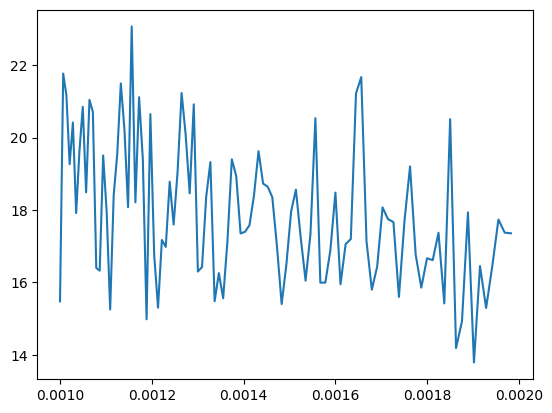

In [100]:
lri = []
lossi = []
for i in range(100): # training loop
    ix = torch.randint(0, X.shape[0], (32,)) # generating random indices to sample from the dataset
    emb = C[X[ix]] # embeddings for all characters in X
    h = emb.view(-1, 6) @ W1 + b1 # matrix multiplication with the weights and adding the bias
    h = torch.tanh(h) # activation function
    logits = h @ W2 + b2 # output layer
    loss = F.cross_entropy(logits, Y[ix]) # calculating the loss
    print(loss.item()) # printing the loss
    for p in parameters:
        p.grad = None # zeroing the gradients
    
    loss.backward() # backpropagation
    lr =lrs[i]
    for p in parameters:
        p.data -= lr * p.grad # updating the parameters with a learning rate of 0.1
    #track 
    lri.append(lrs[i]) # tracking the learning rate
    lossi.append(loss.item()) # tracking the loss
plt.plot(lri, lossi) # plotting the learning rate vs loss
print(loss.item()) # printing the loss

In [101]:
emb = C[X] # embeddings for all characters in X
h = emb.view(-1, 6) @ W1 + b1 # matrix multiplication with the weights and adding the bias
h = torch.tanh(h) # activation function
logits = h @ W2 + b2 # output layer
loss = F.cross_entropy(logits, Y) # calculating the loss
print(loss.item()) # printing the loss

16.57245445251465


In [102]:
#buiding the datast
def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
    return torch.tensor(X), torch.tensor(Y)

In [103]:
import random 
random.seed(2147483647) # setting the random seed for reproducibility
random.shuffle(words) # shuffling the words
n1 = int(0.8 * len(words)) # 80% for training
n2 = int(0.9 * len(words)) # 10% for validation and 10% for test
Xtr, Ytr = build_dataset(words[:n1]) # training set
Xdev, Ydev = build_dataset(words[n1:n2]) # validation set
Xte, Yte = build_dataset(words[n2:]) # test set
print(Xtr.shape, Ytr.shape, Xdev.shape, Ydev.shape, Xte.shape, Yte.shape) # printing the shapes of the datasets

torch.Size([182546, 3]) torch.Size([182546]) torch.Size([22840, 3]) torch.Size([22840]) torch.Size([22760, 3]) torch.Size([22760])


In [104]:
g  = torch.Generator().manual_seed(2147483647) # random number generator for reproducibility
C = torch.randn((27, 10), generator=g) # re-initializing the embedding matrix with a fixed seed
W1 = torch.randn((30, 300), generator=g) # re-initializing the weights for the first layer
b1 = torch.randn(300, generator=g) # re-initializing the bias for the first layer
W2 = torch.randn((300, 27), generator=g) # re-initializing the weights for the second layer
b2 = torch.randn(27, generator=g) # re-initializing the bias for the second layer
parameters = [C, W1, b1, W2, b2] # list of parameters


In [105]:
sum(p.nelement() for p in parameters) # total number of parameters

17697

In [106]:
for p in parameters:
    p.requires_grad = True # setting requires_grad to True for all parameters

In [107]:
lre = torch.linspace(-3, 0, 1000) # learning rate exponential decay
lrs = 10 ** lre # learning rates

In [108]:
lri = []
lossi = []
stepi = []
for i in range(30000): # training loop
    ix = torch.randint(0, Xtr.shape[0], (64,)) # generating random indices to sample from the dataset
    emb = C[Xtr[ix]] # embeddings for all characters in X
    h = emb.view(-1, 30) @ W1 + b1 # matrix multiplication with the weights and adding the bias
    h = torch.tanh(h) # activation function
    logits = h @ W2 + b2 # output layer
    loss = F.cross_entropy(logits, Ytr[ix]) # calculating the loss
    print(loss.item()) # printing the loss
    for p in parameters:
        p.grad = None # zeroing the gradients
    
    loss.backward() # backpropagation
    # lr =lrs[i]
    for p in parameters:
        p.data -= 0.1 * p.grad # updating the parameters with a learning rate of 0.1
    #track 
    # lri.append(lrs[i]) # tracking the learning rate
    stepi.append(i) # tracking the step
    lossi.append(loss.item()) # tracking the loss

32.01412582397461
24.95313835144043
25.439414978027344
25.025339126586914
20.957473754882812
25.873367309570312
26.81252098083496
21.683809280395508
19.58530044555664
20.853260040283203
19.92856788635254
22.99483299255371
20.15977668762207
21.355295181274414
18.098133087158203
18.417428970336914
20.689380645751953
17.20252227783203
17.06417465209961
17.21595001220703
17.143142700195312
15.838587760925293
15.751494407653809
14.235539436340332
18.73023796081543
15.778009414672852
16.215951919555664
15.27690315246582
11.615022659301758
13.01168441772461
13.241870880126953
13.477496147155762
13.059650421142578
10.977322578430176
11.325281143188477
10.916219711303711
15.160001754760742
11.686549186706543
11.793299674987793
13.5258207321167
9.986672401428223
11.559320449829102
11.024503707885742
12.224159240722656
12.17147159576416
11.36060619354248
11.937576293945312
11.177416801452637
8.179537773132324
11.35599422454834
14.422944068908691
12.43152904510498
12.763921737670898
12.70990180969

2.410813808441162
2.485398054122925
2.6479859352111816
2.8071396350860596
2.5756149291992188
3.1373322010040283
2.6501312255859375
2.8546221256256104
2.4741129875183105
2.7118968963623047
2.4457898139953613
2.793532609939575
2.513442277908325
2.5660858154296875
2.7526614665985107
2.532609224319458
2.47015643119812
2.6222496032714844
2.7909350395202637
2.232661247253418
2.442491054534912
2.8096251487731934
2.4070658683776855
2.513072967529297
2.471339702606201
2.516655206680298
2.80349063873291
2.8093149662017822
2.505100727081299
2.6257147789001465
2.555027484893799
2.8059275150299072
2.730426788330078
2.5751895904541016
2.6727499961853027
2.802896499633789
2.7114851474761963
2.4422481060028076
2.1688458919525146
2.653660297393799
3.0499749183654785
3.2024502754211426
2.6908252239227295
2.834108829498291
2.9206743240356445
2.6182093620300293
2.5227396488189697
2.8251349925994873
2.479950428009033
2.4077541828155518
2.717747211456299
2.482001543045044
2.8320930004119873
2.63625144958496

In [109]:
print(loss.item()) # printing the loss

2.3722083568573


In [110]:
emb = C[Xdev] # embeddings for all characters in X
h = emb.view(-1, 30) @ W1 + b1 # matrix multiplication with the weights and adding the bias
h = torch.tanh(h) # activation function
logits = h @ W2 + b2 # output layer
loss = F.cross_entropy(logits, Ydev) # calculating the loss
print(loss.item()) # printing the loss

2.434527635574341


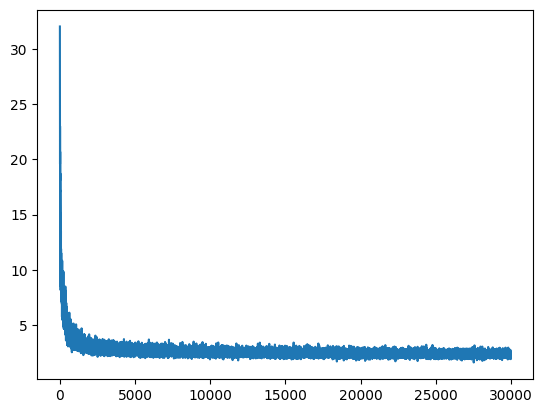

In [111]:
plt.plot(stepi, lossi) # plotting the step vs loss


In [112]:
# # visualize dimensions 0 and 1 of the embedding matrix C for all characters
# plt.figure(figsize=(8,8))
# plt.scatter(C[:,0].data, C[:,1].data, s=200)
# for i in range(C.shape[0]):
#     plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
# plt.grid('minor')

In [113]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carta.
zamirhq.
khkirri.
revio.
skanne.
emmahne.
fares.
rup.
geni.
zerisia.
ceriivia.
leig.
dham.
edin.
quint.
sro.
levi.
adis.
watero.
dearini.
